<h3>Toy example experiment 6.18</h3>

Use the magenpy GWASimulator based on RA's genotypes data (d1CM22_sorted.bed) to simulate phenotypes.  
the heritibility = 0.5, (Gaussian Mixture Proportion)pi = [.85, .15]

In [1]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 

In [2]:
#simulate 
g_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1721000,0.086540
1,0,1722000,-0.837612
2,0,1723000,-0.257485
3,0,1725000,1.127502
4,0,1726000,1.515211
...,...,...,...
172,0,1921000,0.183324
173,0,1922000,1.215019
174,0,1923000,0.757003
175,0,1924000,0.591174


In [47]:
import pandas as pd
pd.read_csv("CMAll_qced/chr22/ALL_CM_chr22.bim", sep="\t", header=None)


,0,1,2,3,4,5
0,22,rs4911642,-11.277499,14884399,G,A
1,22,rs2027653,-7.277181,15298335,G,A
2,22,rs9605903,-5.959143,15434720,G,A
3,22,rs4819849,-5.013115,15532611,G,A
4,22,rs2845380,-4.525156,15583103,A,G
...,...,...,...,...,...,...
18287,22,rs3810648,75.083207,51175626,G,A
18288,22,rs2285395,75.085202,51178090,A,G
18289,22,rs2238837,75.111632,51212875,C,A
18290,22,rs34726907,75.112193,51213613,T,C


In [48]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/d1CM22_sorted.sumstats", sep="\t", index=False
)

> Performing GWAS...


In [49]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
                            sumstats_files="Toy_example_expr/d1CM22_sorted.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [50]:
pd.read_csv("Toy_example_expr/d1CM22_sorted.sumstats", sep="\t", header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,CHR,SNP,POS,A1,A2,MAF,N,BETA,Z,SE,PVAL
1,22,rs4911642,14884399,G,A,0.12721893491124261,169,-0.10066811602744873,-1.3086855083568336,0.07692307692307691,0.19064090255884392
2,22,rs2027653,15298335,G,A,0.3742690058479532,171,0.06575746971452175,0.8598904958056102,0.07647191129018724,0.38984940805409973
3,22,rs5747620,15412698,G,A,0.3953488372093023,172,-0.06470192859415928,-0.8485578383199547,0.07624928516630232,0.3961273759060673
4,22,rs5747968,15447504,C,A,0.3700564971751412,177,0.144060947338801,1.9166062477783603,0.07516460280028288,0.055287973686047466
...,...,...,...,...,...,...,...,...,...,...,...
7916,22,rs715586,49510004,A,G,0.14204545454545456,176,0.03129676816135106,0.4151985485677701,0.0753778361444409,0.67799656125441
7917,22,rs8137951,49512530,A,G,0.2768361581920904,177,0.053257697016744224,0.7085475746908861,0.07516460280028288,0.47860527923270757
7918,22,rs756638,49518559,A,G,0.2471590909090909,176,0.02591073316897566,0.3437447198580345,0.0753778361444409,0.731038276628504
7919,22,rs3810648,49522492,G,A,0.048295454545454544,176,0.06135576764892377,0.8139762400628258,0.0753778361444409,0.4156585625484429


In [51]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/out/ld/')
# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/out/ld/',
#                    window_size=100)

> Computing LD matrix...


In [52]:
# attempt to read the computed LD
gdl_sim.load_ld()
gdl_sim.ld

{22: <magenpy.LDMatrix.LDMatrix at 0x7f3f2848b770>}

In [53]:
i =  10
d1_LD = mgp.LDMatrix.from_path("Toy_example_expr/out/ld/ld/chr_22")
# for i in range(0,7920):
#     print(d1_LD[i].shape)

print(d1_LD.shape)
print(pd.DataFrame(d1_LD))
print("the first snp")
d1_LD[0]

(7920, 7920)
                                                      0
0     [0.9548013806343079, -0.06386563181877136, -0....
1     [-0.06386563181877136, 0.9661023020744324, 0.3...
2     [-0.052265480160713196, 0.3649350702762604, 0....
3     [0.11299331486225128, -0.08305802941322327, -0...
4     [-0.03351875767111778, -0.10596761107444763, -...
...                                                 ...
7915  [-0.012802516110241413, 0.1283041536808014, 0....
7916  [0.04243805631995201, 0.046246979385614395, -0...
7917  [-0.015206963755190372, -0.09169330447912216, ...
7918  [-0.015370112843811512, -0.10893985629081726, ...
7919  [0.021045226603746414, -0.144325390458107, 0.0...

[7920 rows x 1 columns]
the first snp


array([ 0.95480138, -0.06386563, -0.05226548, ..., -0.01520696,
       -0.01537011,  0.02104523])

Use Viprs, initialize the viprs model based on the <code> gdl_sim model</code> containing the GWAS data and the LD matrix (using xarray method) for the chr22.

In [54]:
v = vp.VIPRS(gdl_sim)

In [55]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]

 18%|█▊        | 176/1000 [00:23<01:49,  7.55it/s]

Converged at iteration 177 || ELBO: -251.237770
> Final ELBO: -251.237770
> Estimated heritability: 0.071972
> Estimated proportion of causal variants: 0.058617


For CMdream1/chr22/d1CM22_sorted, with <code> 177 patients</code> as samples.  
Draw the ELBO as a function of iterations. 

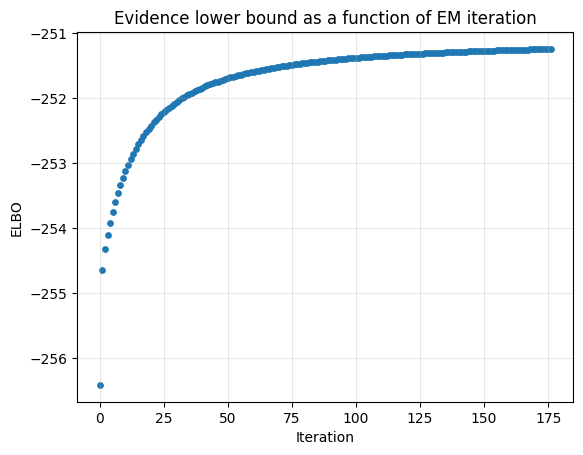

In [56]:
ELBO_list = v.history['ELBO']
num = len(ELBO_list)

#draw a plot Evidence lower bound as a function of EM iteration.
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(range(num), np.array(ELBO_list),s=15)
plt.grid(which="major",alpha=0.3)
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.title("Evidence lower bound as a function of EM iteration")
plt.show()

In [52]:
# Once the model converges, we can generate PRS estimates 
prs_chr22 = v.predict()
print(len(prs_chr22))
prs_chr22

> Generating polygenic scores...
177


array([ 0.02213294,  0.01030989, -0.04751134, -0.02520596, -0.06379665,
       -0.01775891, -0.02176398,  0.00256278, -0.10202483, -0.00537966,
       -0.00684736,  0.00431946, -0.03045196, -0.04494704,  0.06418788,
        0.00809557, -0.11633428, -0.01611182,  0.03895207, -0.00493955,
        0.05093899,  0.05104608,  0.0668653 , -0.04841749, -0.01554006,
       -0.05011316,  0.07380084,  0.01592508, -0.06715295, -0.02340198,
        0.02807839, -0.0182668 , -0.03962565,  0.07902709, -0.01807636,
       -0.04922694, -0.02816407, -0.03047674, -0.00563501,  0.03402863,
        0.03379095, -0.02213383,  0.01395097,  0.00212914, -0.01996996,
        0.02835084,  0.03349162,  0.04290841,  0.06799205,  0.01611444,
       -0.06164484, -0.00410113,  0.0529813 ,  0.05605356, -0.02774756,
       -0.06209518, -0.06550636,  0.03983694, -0.037691  ,  0.10106089,
        0.01048883, -0.06935535, -0.01111233,  0.03445681,  0.00406039,
       -0.0373099 ,  0.07458643, -0.03387453,  0.05089663, -0.00

In [53]:
# To examine posterior estimates for the model parameters, you can simply invoke the .to_table() method:
v.to_table()

,CHR,SNP,A1,A2,BETA,PIP,VAR_BETA
0,22,rs4911642,G,A,0.000154,0.028844,0.000010
1,22,rs2027653,G,A,0.000106,0.028192,0.000009
2,22,rs5747620,G,A,-0.000139,0.028604,0.000010
3,22,rs5747968,C,A,0.000036,0.027630,0.000009
4,22,rs2236639,A,G,-0.000152,0.028781,0.000010
...,...,...,...,...,...,...,...
7915,22,rs715586,A,G,0.000088,0.027993,0.000009
7916,22,rs8137951,A,G,-0.000093,0.028034,0.000009
7917,22,rs756638,A,G,-0.000034,0.027630,0.000009
7918,22,rs3810648,G,A,-0.000248,0.030528,0.000011


<code>Validation</code> use another the simulate phenotype still on the d1chr22_sorted.bed as the validation part. 

In [54]:
#simulate 
g2_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
                         pi = [.99, .01],
                         h2=0.5)
g2_sim.simulate()
a = g2_sim.to_phenotype_table()
a.to_csv("Toy_example_expr/phenotype/g2_sim_pheno.txt",sep='\t', index=False, header=False)
g2_sim.perform_gwas()
g2_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/d1CM22_sorted_valid.sumstats", sep="\t", index=False
)

# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl2_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
                            phenotype_file="Toy_example_expr/phenotype/g2_sim_pheno.txt",
                            sumstats_files="Toy_example_expr/d1CM22_sorted_valid.sumstats",
                            sumstats_format="magenpy")
gdl2_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/out/ld_val/')


> Reading BED file...
> Generating polygenic scores...


> Performing GWAS...
> Reading BED file...
> Reading phenotype file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


In [55]:
val_prs = v.predict(gdl2_sim)

> Generating polygenic scores...


In [56]:
from viprs.eval.metrics import r2 
r2(val_prs, gdl2_sim.sample_table.phenotype)

0.0009120644422682458

Validation use the chr22 genotypes in <code> dream2 </code> file sets.  
Do the same steps as before to got <code>"CMdream2/chr22/d2CM22_sorted"</code> binary file sets (.bed + .fam + .bim).  
Sorted the SNPs from dream2 for chromosome 22 and add CM values to it. 

In [ ]:
d2_bim = pd.read_csv("data/RA_challenge_qced_genotypes/dream2.bim", sep="\t", header=None)
d2_filter_bim = d2_bim[d2_bim[0] ==22][1]
d2_sorted_chr22 = d2_filter_bim.sort_values()
d2_sorted_chr22.to_csv("CMdream2/d2_sorted_chr22_bim.txt", header=False,
                       index=False, sep="\t")

In [6]:
# Use simulate method to create phenotpyes 
#simulate 
# CMdream2/chr22/d2CM22_sorted
g3_sim = mgp.GWASimulator("CMdream2/chr22/d2CM22_sorted",
                         pi = [.85, .15],
                         h2=0.5)
g3_sim.simulate()
a = g3_sim.to_phenotype_table()
a.to_csv("Toy_example_expr/phenotype/val_d2chr22_pheno.txt",sep='\t', index=False, header=False)
g3_sim.perform_gwas()
g3_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/val_d2chr22_valid.sumstats", sep="\t", index=False
)

# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl3_sim = mgp.GWADataLoader(bed_files="CMdream2/chr22/d2CM22_sorted",
                            phenotype_file="Toy_example_expr/phenotype/val_d2chr22_pheno.txt",
                            sumstats_files="Toy_example_expr/val_d2chr22_valid.sumstats",
                            sumstats_format="magenpy",
                            backend="plink")
gdl3_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/d2chr22_out/ld_val/')

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading phenotype file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


Exception ignored in: <finalize object at 0x7fbdb8453070; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_ca2vps9q'


7819 (2606, None)


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


ValueError: Invalid LD Matrix: Element 0 does not have matching LD boundaries!

In [ ]:
val2_prs = v.predict(gdl3_sim)

> Generating polygenic scores...


In [ ]:
#To evaluate the accuracy of the polygenic score, 
# you can use some of the provided metrics with the viprs package. 
# For quantitative traits, it is customary to report the prediction R^2, 
# or the proportion of variance explained by the PRS:
r2(val2_prs, gdl3_sim.sample_table.phenotype)

0.011801941348497371

In [ ]:
#simulate 
g2_sim = mgp.GWASimulator("data/RA_challenge_qced_genotypes/dream3",
                         pi = [.85, .15],
                         h2=0.5)
g2_sim.simulate()
a = g2_sim.to_phenotype_table()

> Reading BED file...


Generating polygenic scores: 100%|██████████| 27/27 [00:06<00:00,  4.33it/s]


In [ ]:
a

,FID,IID,phenotype
0,0,2280000,-1.159332
1,0,2282000,0.457723
2,0,2283000,0.709957
3,0,2284000,-0.482596
4,0,2285000,0.660879
...,...,...,...
412,0,2767000,-1.817492
413,0,2768000,-0.738611
414,0,2769000,-0.103463
415,0,2770000,-1.178744


<h3>June 24th repeat above experiment with the ALL_CM_chr22 data</h3>

*With changing fix-parameters in June 28th*

We checked dream1,2,3 binary files they contain <code>880</code> patients in total. To get the <code>2706 patients</code> we need to <code>merge all</code> RA_challenge_qced_genotypes data together. 

We used the command below to created merge files:  
<code>cd data/RA_challenge_qced_genotypes && bash ../utils/mergeSNPS.sh</code>  
The last file <code> merge10 </code> is the complete file that contains all 11 experiments data, which sums up to 2706 patients.  

Therefore, we can use the <code> merge10.bed + .bim + .fam </code> files to repeat our experiments with magenpy and viprs use the simulator. 

For below, we selected the <code>ALL_CM_chr22 binary files </code>, which is the information about chr22 based on 2706 patients.


In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp

In [63]:
#simulate 
g_sim = mgp.GWASimulator("CMAll_qced/chr22/ALL_CM_chr22",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,0.274872
1,0,2000,1.196193
2,0,3000,-0.594963
3,0,4000,0.394835
4,0,5000,-0.769861
...,...,...,...
2701,0,3061000,-1.152691
2702,0,3062000,-0.402827
2703,0,3064000,-0.070375
2704,0,3065000,0.837928


In [64]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/ALL_CM22.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [65]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/ALL_CM_chr22",
                            sumstats_files="Toy_example_expr/ALL_CM22.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [66]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/ALLchr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Use Viprs, initialize the viprs model based on the <code> gdl_sim model</code> containing the GWAS data and the LD matrix (using xarray method) for the chr22 for all qced dataset (with 2706 individuals).  
(但是后面发现数据有问题，就不predict和比较了, em 但predict 原值还是拿出来看看) 

In [67]:
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [68]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▍        | 145/1000 [01:36<09:28,  1.50it/s]

Converged at iteration 146 || ELBO: -3349.567609
> Final ELBO: -3349.567609
> Estimated heritability: 0.324460
> Estimated proportion of causal variants: 0.001000


For ALL_chr22, with total <code> 2706 patients </code> about <code> chr22 </code>  
Draw the ELBO as a function of iteration. 

In [38]:
import matplotlib.pyplot as plt
#draw a plot Evidence lower bound as a function of EM iteration.

def ELBO_plot(ELBO_list, save_path):
    num = len(ELBO_list)
    plt.figure()
    plt.scatter(range(num), np.array(ELBO_list),s=15)
    plt.grid(which="major",alpha=0.3)
    plt.xlabel("Iteration")
    plt.ylabel("ELBO")
    plt.title("Evidence lower bound as a function of EM iteration")
    plt.savefig(save_path)
    plt.show()

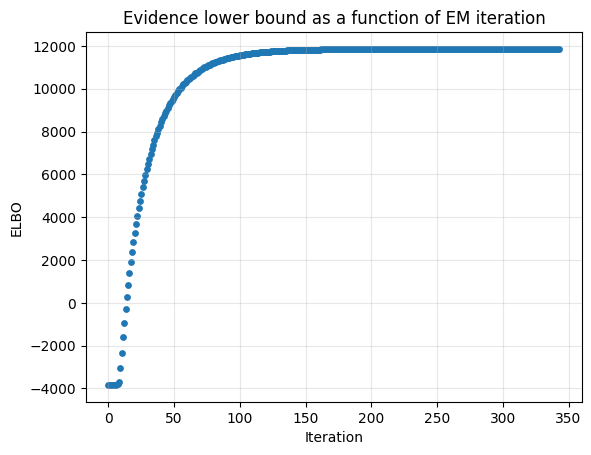

In [39]:
ELBO_list = v.history['ELBO']
ELBO_plot(ELBO_list, "ELBO_history_fig/ALL_chr22.png")

Predict on the same dataset for ALL chr2 and SNPs.

In [71]:
prs_chr22 = v.predict(gdl_sim)
prs_chr22

> Generating polygenic scores...


array([-0.12392879,  0.48792363, -0.17042188, ..., -0.39311331,
       -0.15915304, -0.56749463])

In [72]:
v.to_table()

,CHR,SNP,A1,A2,BETA,PIP,VAR_BETA
0,22,rs4911642,G,A,-2.795566e-05,0.000483,2.176619e-06
1,22,rs2027653,G,A,1.393458e-06,0.000249,1.374616e-06
2,22,rs9605903,G,A,-1.541921e-05,0.000324,1.067718e-06
3,22,rs4819849,G,A,-5.447740e-07,0.000112,1.243038e-07
4,22,rs2845380,A,G,-9.073170e-06,0.000234,5.544837e-07
...,...,...,...,...,...,...,...
18287,22,rs3810648,G,A,-1.034480e-06,0.000081,4.295419e-08
18288,22,rs2285395,A,G,-3.613614e-06,0.000142,1.709740e-07
18289,22,rs2238837,C,A,-3.019228e-05,0.000472,9.049646e-06
18290,22,rs34726907,T,C,-1.584382e-05,0.000434,7.222201e-06


In [73]:
from viprs.eval.metrics import r2
r2(prs_chr22, g_sim.sample_table.phenotype)

0.04385035108228214

<code>QQ plot</code> for ALL-chr22

In [74]:
All_22_sum = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
obs_negP = -np.log10(All_22_sum['PVAL'])

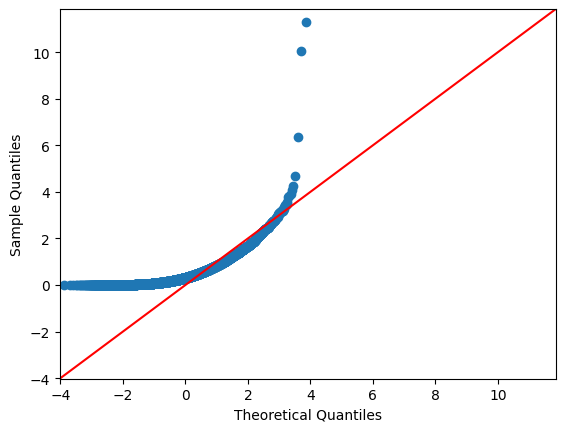

In [75]:
import statsmodels.api as sm
import scipy.stats as stats
import pylab

sm.qqplot(obs_negP, line='45')
pylab.show()

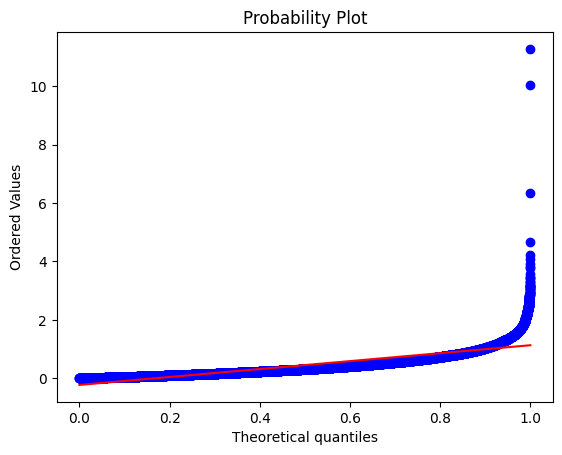

In [76]:
stats.probplot(obs_negP, dist = "uniform", plot = pylab)
pylab.show()

In [125]:
import statsmodels.api as sm



Plot for <code>PIP</code> values

In [126]:
pip_allchr22 = v.to_table()['PIP']
len(pip_allchr22)

18292

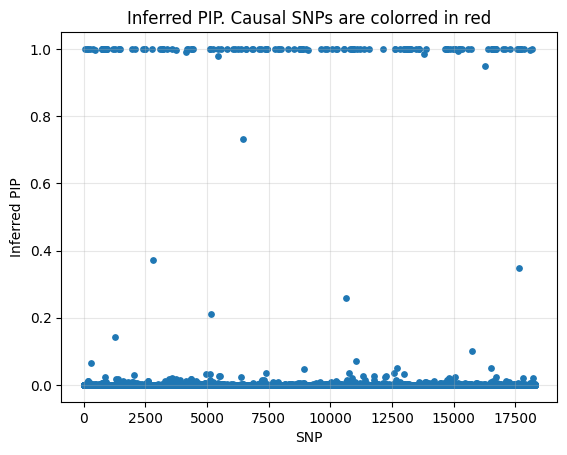

causal
blue: FALSE
red: TRUE


In [127]:
from scipy.ndimage import label
# use  inferred PIP calculated above
num_snp = len(pip_allchr22)

# show the plot pip about professors data
SNP_index_arr = np.arange(num_snp)
plt.scatter(SNP_index_arr, pip_allchr22, s=15)   #  c=causal_color, cmap='coolwarm'
plt.grid(which="major",alpha=0.3)
plt.xlabel("SNP")
plt.ylabel("Inferred PIP")
plt.title("Inferred PIP. Causal SNPs are colorred in red")
plt.show()
print("causal")
print("blue: FALSE")
print("red: TRUE")

<h3> July 2nd, shuffle 100 SNPs </h3>  
from "CMAll_qced/chr22/ALL_CM_chr22" to simulate and run viprs.

In [3]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
from viprs.eval.metrics import r2 

Run shuffled 100SNPs on 2706 samples for 10 times. 

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 22/1000 [00:00<00:00, 1170.49it/s]

Converged at iteration 23 || ELBO: -1433.895232
> Final ELBO: -1433.895232
> Estimated heritability: 0.639847
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  1  th simulation experiment,  the r^2 is  0.5805017204762636



Exception ignored in: <finalize object at 0x7fdb9470aec0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_ir9e5ba9'


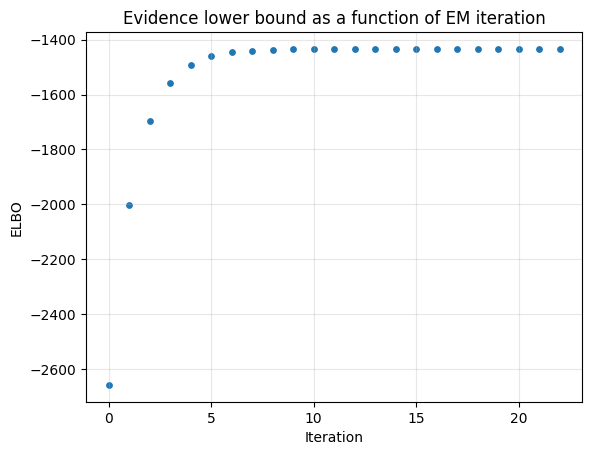

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 9/1000 [00:00<00:00, 1085.61it/s]

Converged at iteration 10 || ELBO: -3480.237833
> Final ELBO: -3480.237833
> Estimated heritability: 0.214525
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  2  th simulation experiment,  the r^2 is  0.1409757104308556



Exception ignored in: <finalize object at 0x7fdb9470a980; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_sgkl1j2a'


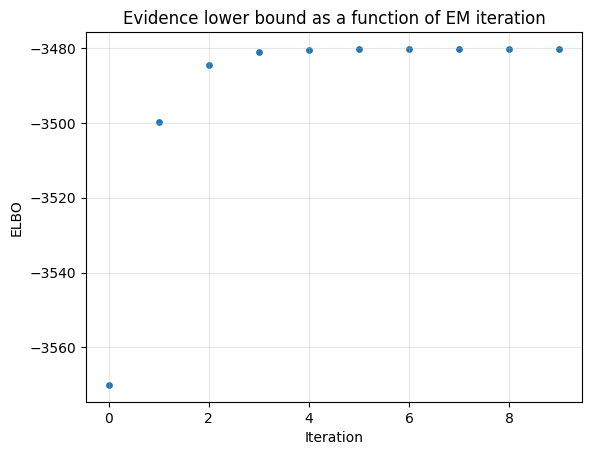

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 24/1000 [00:00<00:00, 1249.40it/s]

Converged at iteration 25 || ELBO: -3625.570985
> Final ELBO: -3625.570985
> Estimated heritability: 0.142006
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  3  th simulation experiment,  the r^2 is  0.010768760615060073



Exception ignored in: <finalize object at 0x7fdb9470a700; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_xa4feya0'


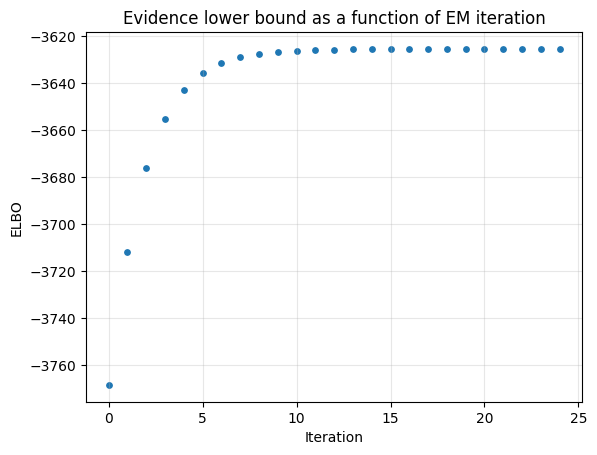

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:00, 1093.01it/s]

Converged at iteration 6 || ELBO: -3477.926699
> Final ELBO: -3477.926699
> Estimated heritability: 0.215663
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  4  th simulation experiment,  the r^2 is  0.2821816218567764



Exception ignored in: <finalize object at 0x7fdb9470a4f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_7owtzxnn'


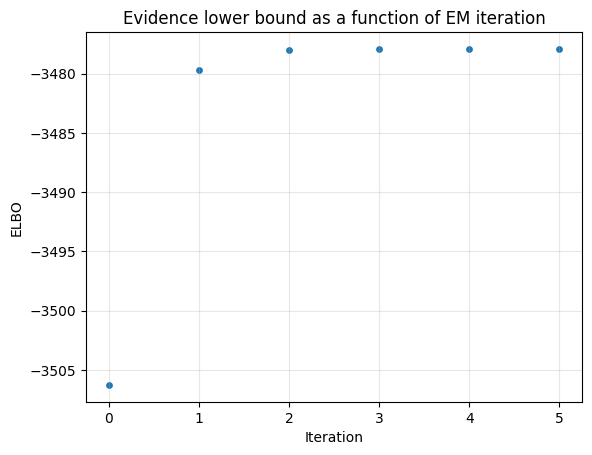

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  8%|▊         | 84/1000 [00:00<00:00, 1269.51it/s]

Converged at iteration 85 || ELBO: -2498.470500
> Final ELBO: -2498.470500
> Estimated heritability: 0.484690
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  5  th simulation experiment,  the r^2 is  0.025371575018360334



Exception ignored in: <finalize object at 0x7fdb71cb4080; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_yo8jtiir'


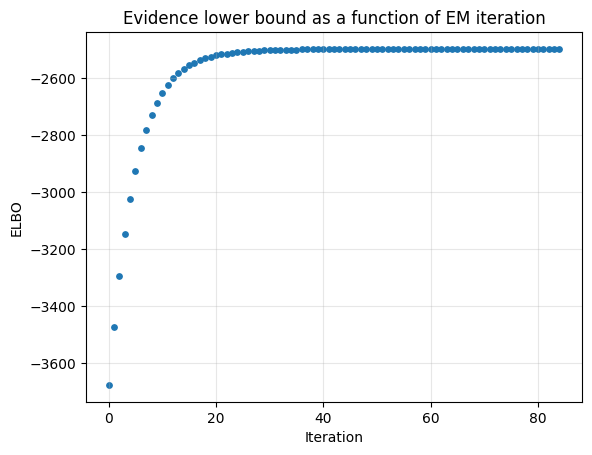

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 10/1000 [00:00<00:00, 1062.52it/s]

Converged at iteration 11 || ELBO: -3291.472703
> Final ELBO: -3291.472703
> Estimated heritability: 0.292160
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  6  th simulation experiment,  the r^2 is  0.1551313392518095



Exception ignored in: <finalize object at 0x7fdb71cb4a70; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_2ja92yfw'


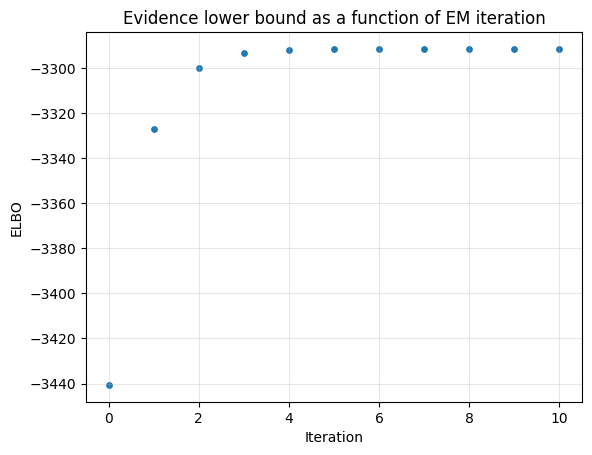

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


ZeroDivisionError: float division by zero

In [84]:

from data.utils.training import train_chr22_100SNPs

shuffle100_r2s = []
for i in range(1,11):
    R2, ELBO_list = train_chr22_100SNPs()
    print("The ", i, " th simulation experiment, ", "the r^2 is ", R2)
    elbo_path = "ELBO_history_fig/shuffled100_itr" + str(i) + ".png"
    ELBO_plot(ELBO_list, elbo_path)
    shuffle100_r2s.append(R2)

# calcuate the mean of r2   


# ELBO_plot(ELBO_list, "ELBO_history_fig/test_shuffled100SNPs.png")

In [85]:
shuffle100_r2s

[0.5805017204762636,
 0.1409757104308556,
 0.010768760615060073,
 0.2821816218567764,
 0.025371575018360334,
 0.1551313392518095]

In [87]:
sum(shuffle100_r2s)/len(shuffle100_r2s)

0.19915512127485424

Run once on chr22 shuffled 100 SNPs with 2706 samples. 

In [66]:
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_100snps",
                            pi = [.99, .01],
                            h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,-1.064242
1,0,2000,-0.409956
2,0,3000,-1.089124
3,0,4000,-1.171410
4,0,5000,0.064499
...,...,...,...
2701,0,3061000,0.127860
2702,0,3062000,0.776593
2703,0,3064000,-0.412175
2704,0,3065000,-0.172503


In [67]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/shuffle_100snps.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [68]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/shuffle_100snps",
                            sumstats_files="Toy_example_expr/shuffle_100snps.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [69]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/shuffle100_chr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Use viprs on suffle selected 100 SNPs

In [70]:
# viprs
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [71]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Iteration 2: ELBO dropped from -3839.293181 to -3839.358619.
  """Entry point for launching an IPython kernel.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Iteration 3: ELBO dropped from -3839.358619 to -3839.410934.
  """Entry point for launching an IPython kernel.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Iteration 4: ELBO dropped from -3839.410934 to -3839.450003.
  """Entry point for launching an IPython kernel.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Iteration 5: ELBO dropped from -3839.450003 to -3839.479451.
  """Entry point for launching an IPython kernel.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.

> Final ELBO: -3839.570554
> Estimated heritability: 0.000074
> Estimated proportion of causal variants: 0.001000


<code>Validation</code> on the same shuffled 100 SNPs data but different phenotypes

In [31]:
# #simulate 
# g2_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
#                          pi = [.99, .01],
#                          h2=0.5)
# g2_sim.simulate()
# a = g2_sim.to_phenotype_table()
# a.to_csv("Toy_example_expr/phenotype/g2_sim_pheno.txt",sep='\t', index=False, header=False)
# g2_sim.perform_gwas()
# g2_sim.to_summary_statistics_table().to_csv(
#     "Toy_example_expr/d1CM22_sorted_valid.sumstats", sep="\t", index=False
# )

# # Load summary statistics（simulate phenotype from above) and match them with perviously
# gdl2_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
#                             phenotype_file="Toy_example_expr/phenotype/g2_sim_pheno.txt",
#                             sumstats_files="Toy_example_expr/d1CM22_sorted_valid.sumstats",
#                             sumstats_format="magenpy")
# gdl2_sim.compute_ld(estimator='sample',
#                    output_dir='Toy_example_expr/out/ld_val/')
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle100_phe.txt",sep='\t', index=False, header=False)



In [32]:
val_prs = v.predict(gdl_sim)

> Generating polygenic scores...


In [33]:
from viprs.eval.metrics import r2 
r2(val_prs, g_sim.sample_table.phenotype)

0.010116287447081873

<h3> July 8th, genomic control (GC) factor</h3> 
It is better if GC factor is close to 1,  
if it is over 1, which means global inflation. 


In [7]:
import numpy as np
from scipy.stats import chi2
def calculate_lambda(p_values):
    # Calculate the genomic inflation factor (λ)
    observed_chi2 = -2 * np.log(p_values)
    lambda_gc = np.median(observed_chi2) / chi2.ppf(0.5, 1)
    return lambda_gc

In [8]:
# read the sumstats file and extract column of P-values
All_22_sum = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
p_values = All_22_sum['PVAL']

# calculate GC factor
gc = calculate_lambda(p_values)
print("GC: ", gc)

GC:  3.3288331146299783


<h5> LD regression 算 interval 是否有inflation (应该感觉inflation 是非常大的) </h5>   

1. Store gwas and LD for all chr22 into <code> .txt files </code>.  
2. Read <code> LD results of "sample" estimator</code> for ALL_chr22, which is a SNPs * SNPs LD.  
Then store it into a .csv file and dataframe.

** 但是由于之前已经看见问题十分严重，可以看得出来inflation 挺严重的，cofounder effect possibly due to age/sex/DAS score

In [78]:
# For ALL chr22 (2706 individuals) （use around 20mins to store!)
# store gwas summary statistics into .txt
gwas_All22_sums = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
gwas_All22_sums = gwas_All22_sums.to_csv("Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv", index=False, sep="\t")

# store LD
All22_LD = mgp.LDMatrix.from_path('Toy_example_expr/ALLchr22_out/ld/chr_22')
pd.DataFrame(All22_LD.z_array).to_csv("Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv", index=False, sep="\t")

In [2]:
# Set paths to LD scores and GWAS summary statistics CSV files
ld_scores_file = "Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv"
gwas_sumstats_file = "Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv"
# Run LD score regression using ldsc.py
ldsc_command = f"ldsc.py --h2 {gwas_sumstats_file} --ref-ld-chr {ld_scores_file} --w-ld-chr {ld_scores_file} --out output_results"
subprocess.run(ldsc_command, shell=True)

*********************************************************************
* LD Score Regression (LDSC)
* Version 2.0.0
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--out output_results \
--h2 Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv \
--ref-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv \
--w-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv 

Beginning analysis at Sat Jul  8 18:00:14 2023
Reading summary statistics from Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv ...
Read summary statistics for 18292 SNPs.
Reading reference panel LD Score from Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv[1-22] ... (ldscore_fromlist)
Analysis finished at Sat Jul  8 18:00:14 2023
Total time elapsed: 0.07s


Traceback (most recent call last):
  File "/home/mcb/users/yzhu439/RA_Project/.venv/bin/ldsc.py", line 645, in <module>
    sumstats.estimate_h2(args, log)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 325, in estimate_h2
    M_annot, w_ld_cname, ref_ld_cnames, sumstats, novar_cols = _read_ld_sumstats(
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 243, in _read_ld_sumstats
    ref_ld = _read_ref_ld(args, log)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 81, in _read_ref_ld
    ref_ld = _read_chr_split_files(args.ref_ld_chr, args.ref_ld, log,
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 152, in _read_chr_split_files
    out = parsefunc(_splitp(chr_arg), _N_CHR, **kwargs)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldsco

CompletedProcess(args='ldsc.py --h2 Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv --ref-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv --w-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv --out output_results', returncode=1)

In [ ]:
# # Convert GWAS summary statistics DataFrame to text
# gwas_All22_sums = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
# gwas_sumstats_df = pd.DataFrame(...)  # Replace with your GWAS summary statistics DataFrame
# gwas_sumstats_text = gwas_sumstats_df.to_csv(index=False, sep="\t")
# # Convert LD scores DataFrame to text
# ld_scores_df = pd.DataFrame(...)  # Replace with your LD scores DataFrame
# ld_scores_text = ld_scores_df.to_csv(index=False, sep="\t")
# # Run LD score regression using LDSC
# ldsc_command = "ldsc.py --h2-cts stdin --ref-ld-chr stdin --w-ld-chr stdin --out output_results"
# ldsc_process = subprocess.run(ldsc_command, input=gwas_sumstats_text, input_encoding='utf-8', shell=True, capture_output=True, text=True)
# output = ldsc_process.stdout
# # Load the LDSC regression results from the output
# ldsc_results = pd.read_csv(io.StringIO(output), sep="\t")
# # Print the regression results
# print(ldsc_results)

<h3> Add Covariates_files to GWASLoader </h3>, July 9th. 
Then run it. 

In [22]:
#simulate 
g_sim = mgp.GWASimulator("CMAll_qced/chr22/ALL_CM_chr22",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,0.585037
1,0,2000,1.460501
2,0,3000,0.407756
3,0,4000,-0.346001
4,0,5000,0.715634
...,...,...,...
2701,0,3061000,-1.135170
2702,0,3062000,-0.565018
2703,0,3064000,-0.661585
2704,0,3065000,0.625329


In [23]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/ALL_CM22.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [24]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/ALL_CM_chr22",
                            covariates_file="data/Dosage_for_PCA/chr22_covariates.csv",
                            sumstats_files="Toy_example_expr/ALL_CM22.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading covariates file...
> Reading summary statistics file...
> Harmonizing data...


In [25]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/ALLchr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


viprs on gdl_sim, with covariates_file for chr22 with samples 2706

In [26]:
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [27]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


100%|██████████| 1000/1000 [09:53<00:00,  1.68it/s]

> Final ELBO: 1517.250069
> Estimated heritability: 0.784255
> Estimated proportion of causal variants: 0.001000



/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Maximum iterations reached without convergence. You may need to run the model for more iterations.
  """Entry point for launching an IPython kernel.


In [28]:
prs_chr22 = v.predict(gdl_sim)
prs_chr22

> Generating polygenic scores...


array([ 1.82466011, -1.67416997,  0.49465992, ..., -4.7011178 ,
       -5.97248231, -5.21628394])

In [29]:
g_sim.sample_table.phenotype.shape

(2706,)

In [30]:
from viprs.eval.metrics import r2
r2(prs_chr22, g_sim.sample_table.phenotype)

0.031342502093083084